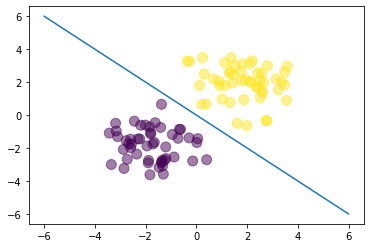

In [2]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# get the closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

##

134.21722639069947
1.3384556509233665
0.1683290915166334
0.08019293848064715
0.052811888039950246
0.039793531998721945
0.03228181644126451
0.027438582064267903
0.024082811235967734
0.021637448568233554
Final w: [-1.23602797 15.5440848  10.7007884 ]


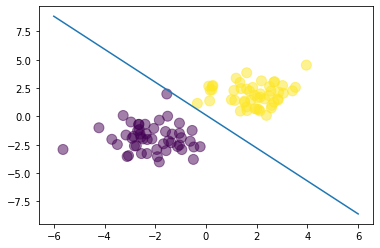

In [4]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E


# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    # w += learning_rate * np.dot((T - Y).T, Xb) # old
    w += learning_rate * Xb.T.dot(T - Y)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

3.8211307180213945
2.055723984923942
1.40337164974053
1.0728865823523244
0.8868277656757416
0.7731401981164447
0.6994046085338192
0.6494812616966165
0.6146102689886048
0.589690962924964


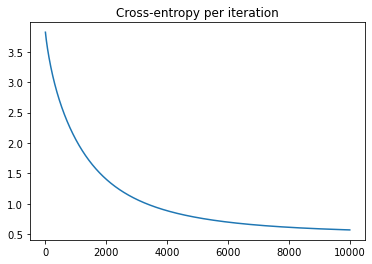

Final w: [-1.47686912 -7.65390195  3.3960417   3.39604171]
Final classification rate: 1.0


In [5]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt

N = 4
D = 2

# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
T = np.array([0, 1, 1, 0])

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))

# add a column of xy = x*y
xy = (X[:,0] * X[:,1]).reshape(N, 1)
Xb = np.concatenate((ones, xy, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E


# let's do gradient descent 100 times
learning_rate = 0.01
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)